In [1]:
import os
import math
import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (720, 1280, 3)


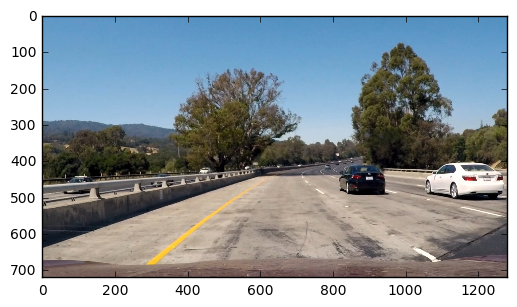

In [2]:
image = mpimg.imread('test_images/test1.jpg')
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image);

# Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [3]:
def load_imgs(path):
    files =  glob.glob(path) 
    imgs = [mpimg.imread(img_path) for img_path in files ]
    return imgs

def plot_imgs(imgs, cmap=None):
    columns = min(len(imgs), 5)
    rows = math.ceil(len(imgs) / columns)
    plt.figure(figsize=(16,8))
    for i, img in enumerate(imgs):
        plt.subplot(rows, columns, i+1)
        plt.imshow(img, cmap=cmap)
    plt.show()

def calc_undistort(imgs):
    CROSSES = (6, 9)
    gray_images = [cv2.cvtColor(i, cv2.COLOR_RGB2GRAY) for i in imgs]
    objpoints = []
    imgpoints = []
    
    objp = np.zeros((CROSSES[0]*CROSSES[1], 3), np.float32)
    objp[:,:2] = np.mgrid[0:CROSSES[0], 0:CROSSES[1]].T.reshape(-1, 2) # x, y coordinates

    for i, gray in enumerate(gray_images):
        ret, corners = cv2.findChessboardCorners(gray, CROSSES, None)
        if ret:
            imgs[i] = cv2.drawChessboardCorners(imgs[i], CROSSES, corners, ret)
            imgpoints.append(corners)
            objpoints.append(objp)
            
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    imgs = [cv2.undistort(img, mtx, dist, None, mtx) 
            for img in imgs]
            
    return imgs, mtx, dist

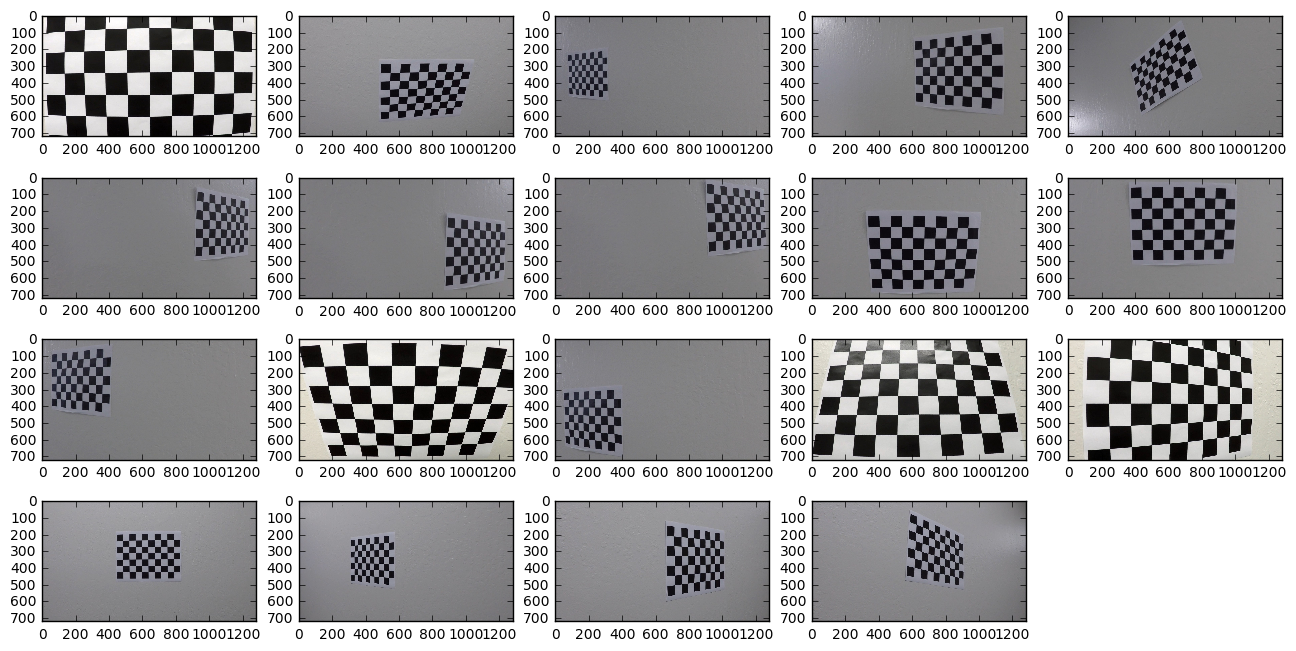

Undistorted images and found crosses.


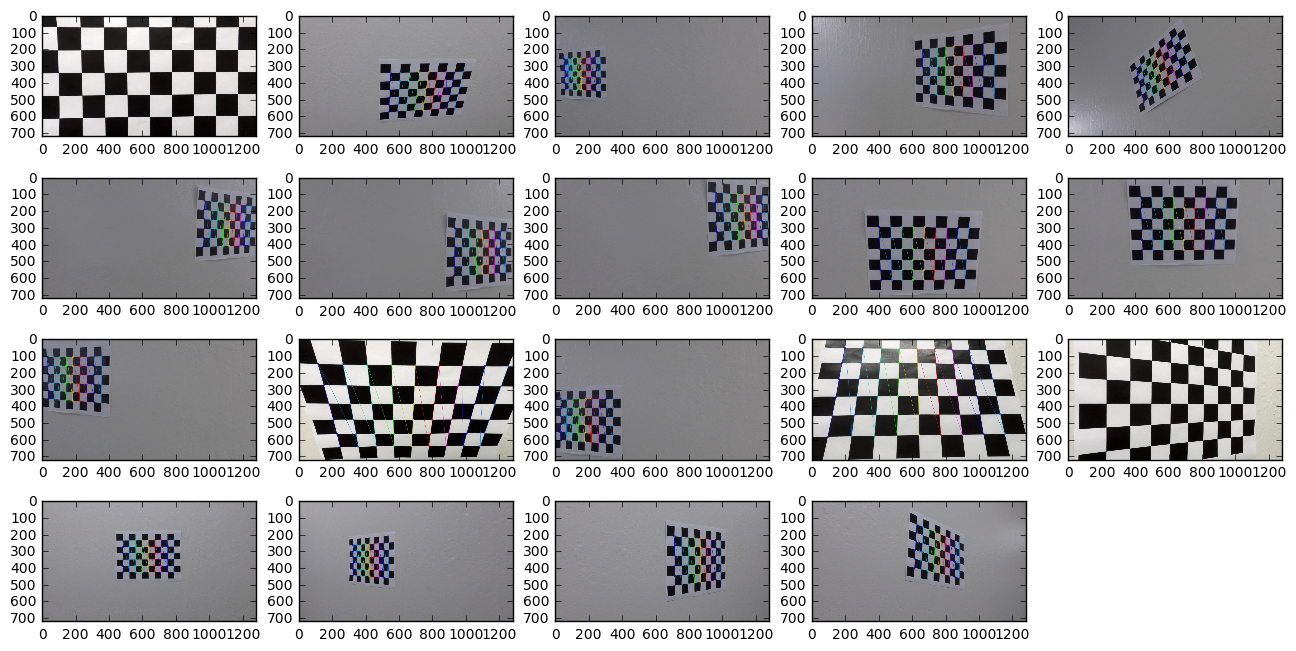

In [4]:
calibration_imgs = load_imgs('./camera_cal/calibration*.jpg')
plot_imgs(calibration_imgs)
undistorded_imgs, mtx, dist = calc_undistort(calibration_imgs)
print('Undistorted images and found crosses.')
plot_imgs(undistorded_imgs)

# Apply the distortion correction to the raw image.

In [5]:
def undistort_img(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx) 
    return undist

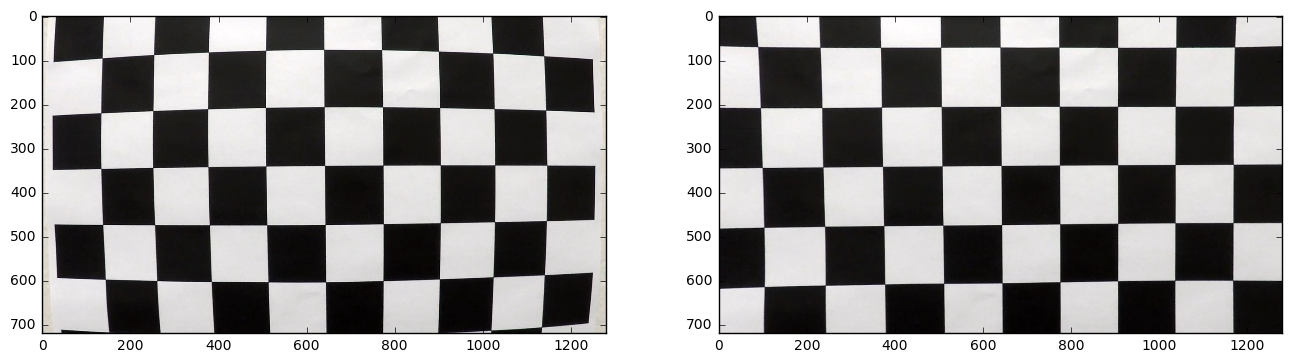

In [6]:
image = calibration_imgs[0]
plot_imgs([image, undistort_img(image, mtx, dist)])

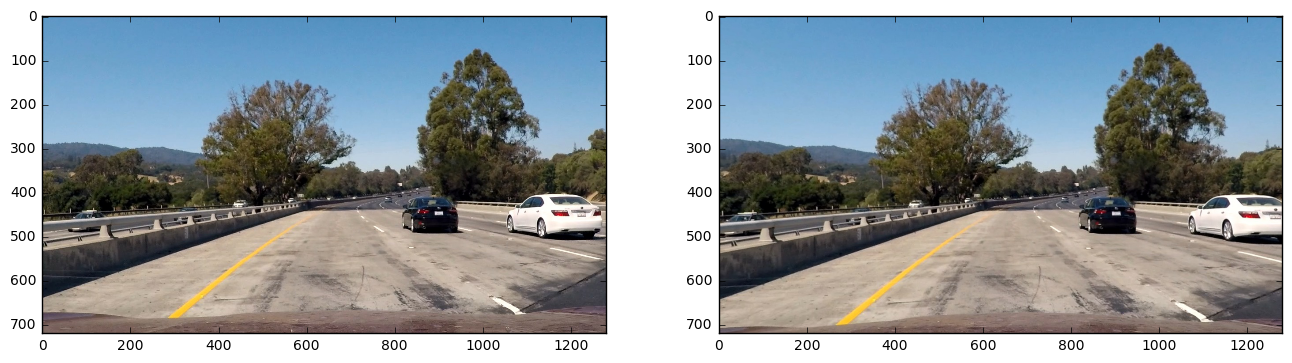

In [7]:
image = mpimg.imread('test_images/test1.jpg')
image_2 = undistort_img(image, mtx, dist)
plot_imgs([image, image_2])

In [22]:
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    e.g. usage: # image =  weighted_img(image, image_orig, α=0.5, β=0.5, λ=0.)
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)


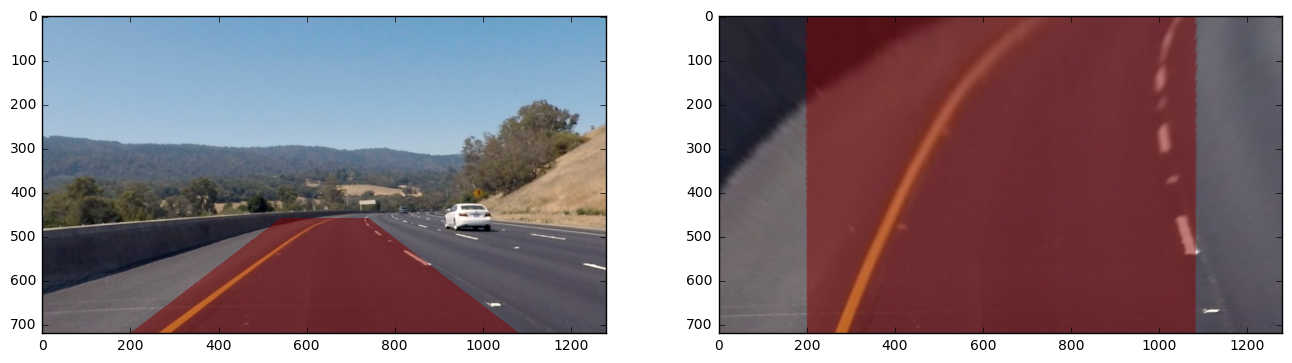

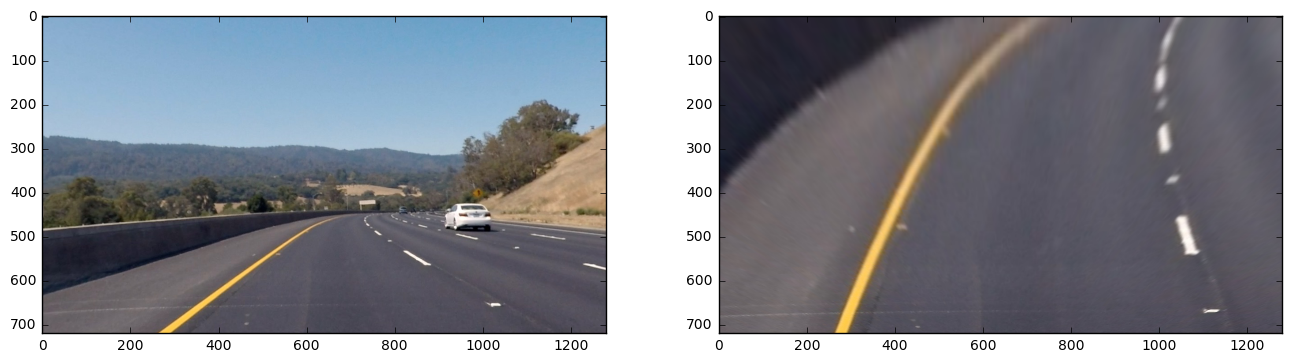

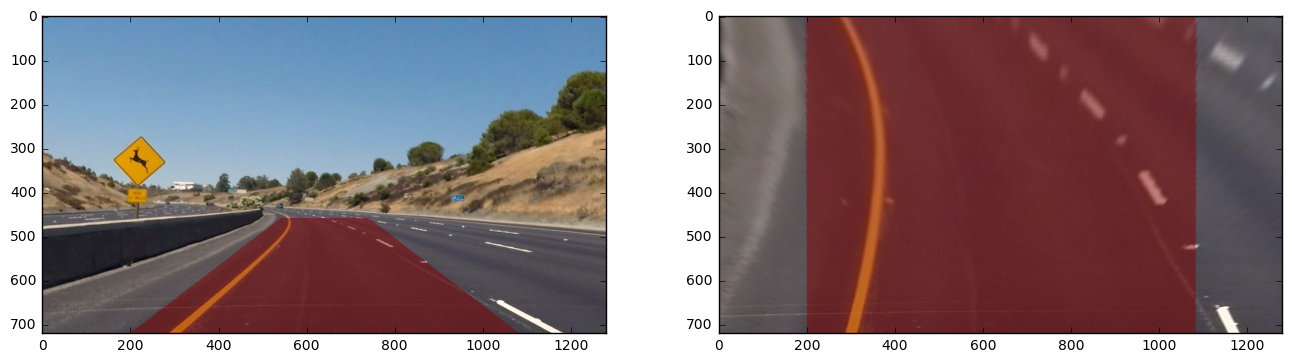

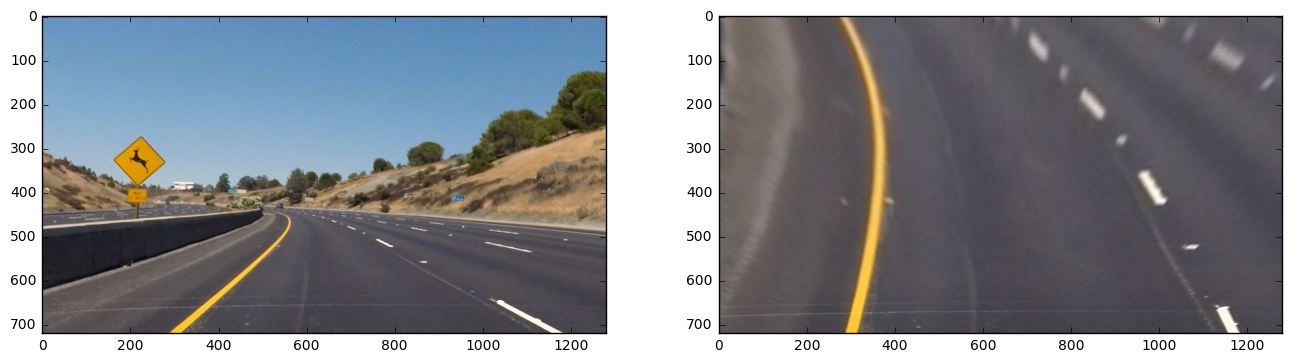

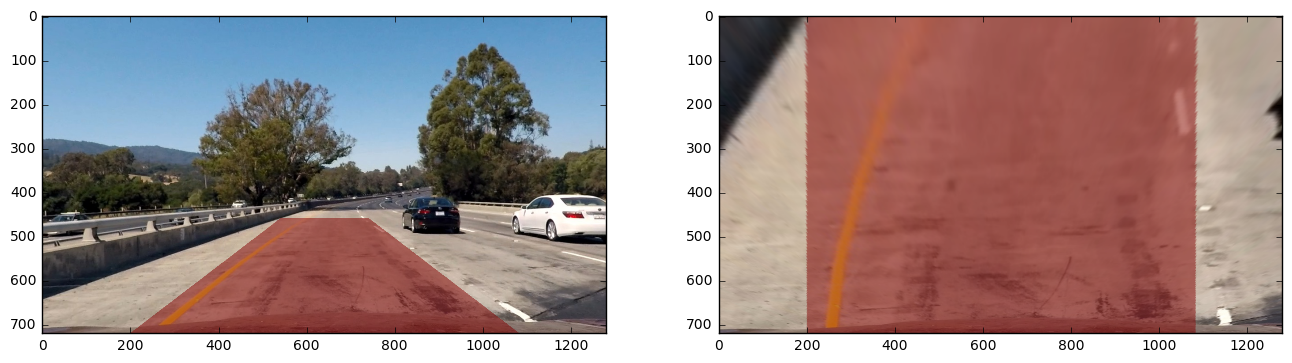

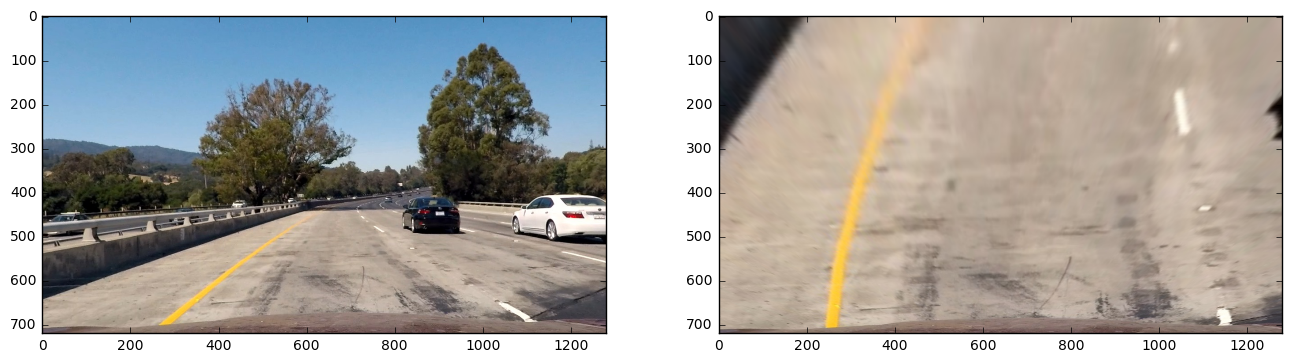

In [44]:
def apply_perspective_transform(img, plot=False):

    y, x = img.shape[:2]


    src = np.float32(
        [[200, y],
         [x/2-100, y/2 + 100],
         [x/2+100, y/2 + 100],
         [x-200, y],
        ])

    dst = np.float32(
        [[200, y],
         [200, 0],
         [x-200, 0],
         [x-200, y],
         ])
    
    if False:
        plt.figure();
        plt.hold(True);
        plt.imshow(img);
        plt.grid();

        for p in src:
            plt.plot(p[0], p[1], '.', c='r');

        for p in dst:
            plt.plot(p[0], p[1], '.', c='g');

    M = cv2.getPerspectiveTransform(src, dst)

    warped = cv2.warpPerspective(img, M, (x,y), flags=cv2.INTER_LINEAR)
    if plot:
        image_poly = cv2.fillConvexPoly(np.copy(img), src.astype(np.int32), 128)
        image_poly = weighted_img(image_poly, img, α=0.5, β=0.5, λ=0.)
        warped_polygon = cv2.warpPerspective(image_poly, M, (x,y), flags=cv2.INTER_LINEAR)
        plot_imgs([image_poly, warped_polygon])
        plot_imgs([img, warped])
    
    return warped
    
image = mpimg.imread('test_images/test3.jpg')
image = undistort_img(image, mtx, dist)
image = apply_perspective_transform(image, True)

image = mpimg.imread('test_images/test2.jpg')
image = undistort_img(image, mtx, dist)
image = apply_perspective_transform(image, True)

image = mpimg.imread('test_images/test1.jpg')
image = undistort_img(image, mtx, dist)
image = apply_perspective_transform(image, True)


# TODO:
# Note: When you apply a perspective transform, choosing four source points manually is often not the best option. 
# There are many other ways to select source points. For example, many perspective transform algorithms will programmatically detect four source points in an image based on edge or corner detection and analyzing attributes like color and surrounding pixels.


# Use color transforms, gradients, etc., to create a thresholded binary image.

In [ ]:
Camera calibration
Distortion correction
Color/gradient threshold
Perspective transform
